In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
from torchvision.utils import save_image

import numpy as np
import matplotlib.pyplot as plt
import functools

from networks import UnetGenerator
from datasets import loadHeat

In [33]:
# Define training parameters
batch_size=64
learning_rate = 1e-3
num_epochs = 200

In [3]:
# Input image handling
dataset = loadHeat(32)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [4]:
# Initialize U-Net (or ResNet) convolutional architecture
net = UnetGenerator(1, 1, 3, 64, norm_layer=functools.partial(nn.BatchNorm2d, affine=True), use_dropout=False, gpu_ids=[]).cuda()

In [5]:
# Define physics loss
kernel = Variable(torch.Tensor(np.array([[[[0, 1/4, 0], [1/4, -1, 1/4], [0, 1/4, 0]]]]))).cuda()

def physical_loss(img):
    return F.conv2d(img, kernel).norm()

criterion = physical_loss
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [6]:
# Create output masks
center_mask = torch.zeros(dataset[0].shape).unsqueeze(0)
center_mask[:,:,:,0] = 1
center_mask[:,:,0,:] = 1
center_mask[:,:,:,-1] = 1
center_mask[:,:,-1,:] = 1

boundary_mask = torch.ones(dataset[0].shape).unsqueeze(0)
boundary_mask[:,:,:,0] = 0
boundary_mask[:,:,0,:] = 0
boundary_mask[:,:,:,-1] = 0
boundary_mask[:,:,-1,:] = 0

center_mask = Variable(center_mask).cuda()
boundary_mask = Variable(boundary_mask).cuda()

In [ ]:
# Outer training loop
## Training loop
for epoch in range(num_epochs):
    for data in dataloader:
        img = Variable(data).cuda()
        output = net(img)
        output = output*boundary_mask + img*center_mask
        loss = criterion(output)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch+1, num_epochs, loss.data[0]))
#     if epoch % 10 == 0:
#         train_pic = to_img(img.cpu().data)
#         gen_pic = to_img(output.cpu().data)
#         save_image(train_pic, './decoded_mnist/image_{}_train.png'.format(epoch))
#         save_image(gen_pic, './decoded_mnist/image_{}_gen.png'.format(epoch))

epoch [1/200], loss:762.2281
epoch [2/200], loss:792.0709
epoch [3/200], loss:766.0944
epoch [4/200], loss:767.9222
epoch [5/200], loss:787.4492
epoch [6/200], loss:803.7881
epoch [7/200], loss:763.2432
epoch [8/200], loss:749.2528
epoch [9/200], loss:756.6626
epoch [10/200], loss:764.7425
epoch [11/200], loss:795.4534
epoch [12/200], loss:795.6841
epoch [13/200], loss:760.7844
epoch [14/200], loss:798.0470
epoch [15/200], loss:754.3182
epoch [16/200], loss:778.0048
epoch [17/200], loss:786.9000
epoch [18/200], loss:793.2208
epoch [19/200], loss:761.3450
epoch [20/200], loss:773.1436
epoch [21/200], loss:751.9680
epoch [22/200], loss:772.7051
epoch [23/200], loss:772.9944
epoch [24/200], loss:794.0979
epoch [25/200], loss:748.4763
epoch [26/200], loss:754.1100
epoch [27/200], loss:751.4987
epoch [28/200], loss:785.0717
epoch [29/200], loss:786.3965
epoch [30/200], loss:739.5111
epoch [31/200], loss:792.7220
epoch [32/200], loss:777.5800
epoch [33/200], loss:754.5837
epoch [34/200], los

In [ ]:
## Save model

In [25]:
# Output image handling
# heat = Variable(torch.Tensor(np.loadtxt('datasets/small_data/BC/0-10-20-90.csv', delimiter=','))).cuda()
heat = Variable(torch.Tensor(np.loadtxt('datasets/4-16/16/BC/0-10-20-90.csv', delimiter=','))).cuda()


In [26]:
output = net(heat.unsqueeze(0).unsqueeze(0))

In [27]:
output

Variable containing:
(0 ,0 ,.,.) = 

Columns 0 to 8 
   0.9997  0.9998  0.9864  0.9417  0.9977  0.9812  0.9985  0.9739  0.9981
  1.0000  1.0000  0.3491  0.9723  0.9996  0.9998  0.9998  0.9996  0.9997
  1.0000  0.9999 -1.0000 -1.0000 -0.9993 -0.9978 -0.9986 -0.9995 -0.9994
  1.0000  1.0000 -1.0000 -1.0000 -1.0000 -0.9999 -0.9999 -0.9999 -0.9999
  1.0000  1.0000 -1.0000 -1.0000 -0.9996 -0.9986 -0.9990 -0.9993 -0.9992
  1.0000  1.0000 -1.0000 -0.9999 -0.9971 -0.9932 -0.9928 -0.9968 -0.9941
  1.0000  1.0000 -1.0000 -0.9999 -0.9963 -0.9892 -0.9892 -0.9939 -0.9906
  1.0000  1.0000 -1.0000 -1.0000 -0.9974 -0.9912 -0.9906 -0.9940 -0.9905
  1.0000  1.0000 -1.0000 -0.9999 -0.9981 -0.9917 -0.9915 -0.9945 -0.9928
  1.0000  1.0000 -1.0000 -0.9999 -0.9937 -0.9873 -0.9836 -0.9909 -0.9785
  1.0000  1.0000 -1.0000 -0.9999 -0.9979 -0.9953 -0.9958 -0.9975 -0.9971
  1.0000  1.0000 -1.0000 -1.0000 -0.9989 -0.9990 -0.9991 -0.9995 -0.9996
  1.0000  1.0000 -1.0000 -1.0000 -0.9999 -0.9998 -0.9999 -0.9999 -0.99

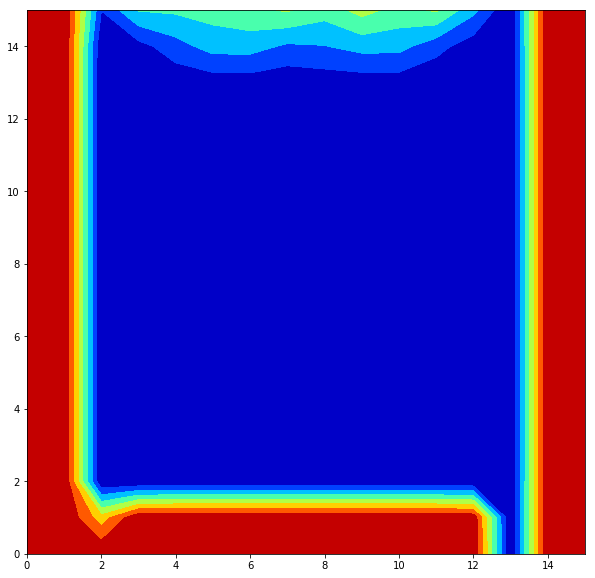

In [32]:
plt.figure(figsize=(10,10))
XX, YY = np.meshgrid(np.arange(0, dataset[0].shape[-1]), np.arange(0, dataset[0].shape[-1]))
plt.contourf(XX, YY, output.cpu().data.numpy()[0,0,:,:], colorinterpolation=50, cmap=plt.cm.jet)
# plt.imshow(output.cpu().data.numpy()[0,0,:,:])
plt.show()

## Miscellaneous Tests

In [2]:
kernel_ = np.array([[0, 1/4, 0], [1/4, -1, 1/4], [0, 1/4, 0]])
kernel = Variable(torch.Tensor(kernel_))
img = Variable(torch.rand(10,10))

def physical_loss(img):
#     return F.conv2d((img.unsqueeze(0)).unsqueeze(0), kernel.unsqueeze(0).unsqueeze(0)).norm()
    return F.conv2d((img.unsqueeze(0)).unsqueeze(0), kernel.unsqueeze(0).unsqueeze(0))

In [4]:
physical_loss(img)

Variable containing:
(0 ,0 ,.,.) = 
  0.0292  0.3121 -0.2342 -0.1250 -0.2445 -0.3733 -0.2806 -0.1527
 -0.1400  0.0060  0.4090 -0.1374  0.3424  0.0427  0.4813 -0.0692
 -0.4020  0.5477 -0.7780  0.2630  0.0718  0.2802  0.2284 -0.6202
  0.1652 -0.6265  0.2452  0.3149 -0.2875 -0.3081 -0.1356  0.6590
 -0.3522  0.6148 -0.2975  0.1686 -0.2690 -0.1233  0.1784 -0.2472
 -0.0768 -0.2584  0.2547  0.2669 -0.1479  0.3965  0.1607  0.1083
 -0.4120  0.3863  0.2018 -0.5286  0.2726 -0.0041 -0.4462  0.2418
  0.5019  0.2671 -0.2837 -0.2454 -0.3699 -0.2484  0.1922  0.3512
[torch.FloatTensor of size 1x1x8x8]

In [5]:
# Heat is true ground truth solution
heat_ = np.loadtxt('datasets/32_small/field/0-10-20-90.csv', delimiter=',')
heat = Variable(torch.Tensor(heat_))
heat

Variable containing:
 20.0000  10.0000  10.0000  ...   10.0000  10.0000  90.0000
 20.0000  15.0134  13.0503  ...   34.1378  49.9750  90.0000
 20.0000  17.0032  15.0536  ...   49.8999  65.7621  90.0000
           ...               ⋱              ...            
 20.0000  13.9912  10.0765  ...   44.9228  62.7501  90.0000
 20.0000  10.0191   6.0853  ...   27.1727  44.9807  90.0000
 20.0000   0.0000   0.0000  ...    0.0000   0.0000  90.0000
[torch.FloatTensor of size 64x64]

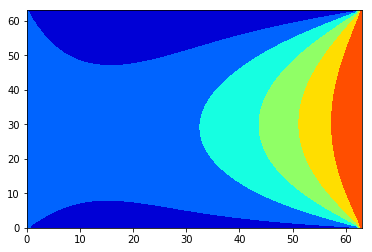

In [6]:
XX, YY = np.meshgrid(np.arange(0, 64), np.arange(0, 64))
plt.contourf(XX, YY, heat.data.numpy(), colorinterpolation=50, cmap=plt.cm.jet, vmin=0, vmax=100)
plt.show()

In [7]:
physical_loss(heat)

Variable containing:
(0 ,0 ,.,.) = 
1.00000e-03 *
  0.0072  0.0136  0.0191  ...   0.0143  0.0095  0.0038
  0.0143  0.0234  0.0329  ...   0.0257  0.0124  0.0038
  0.0191  0.0334  0.0458  ...   0.0334  0.0191  0.0076
           ...             ⋱             ...          
  0.0148  0.0229  0.0327  ...   0.0210  0.0095  0.0057
  0.0088  0.0143  0.0199  ...   0.0114  0.0081 -0.0010
  0.0038  0.0052  0.0072  ...   0.0043  0.0010 -0.0019
[torch.FloatTensor of size 1x1x62x62]

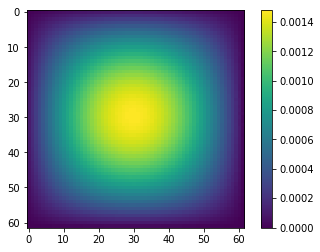

In [8]:
# Ground truth satisfies small value when kernel is applied
plt.imshow(physical_loss(heat).data.numpy()[0,0,:,:])
plt.colorbar()
plt.show()